In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import ehtplot
import matplotlib as mpl
from matplotlib import pyplot as plt, cm

import numpy as np

plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#    'mathtext.fontset': 'custom',
#    'mathtext.rm': 'Bitstream Vera Sans',
#    'mathtext.it': 'Bitstream Vera Sans:italic',
#    'mathtext.bf': 'Bitstream Vera Sans:bold',   
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
})

from common import viz
from common import io_ipole as io

In [3]:
imgP  = io.load_img('model/Illinois_thermal/230GHz/Ma+0.5_w5/img_s05990_Rh40_i30.h5')
summP = pd.read_csv('cache/Illinois_thermal_w5/Ma+0.5_i30/summ_Rh40_230GHz.tsv', sep='\t').iloc[-9]

imgF  = io.load_img('model/Illinois_thermal/230GHz/Sa0_w5/img_s05990_Rh1_i10.h5')
summF = pd.read_csv('cache/Illinois_thermal_w5/Sa0_i10/summ_Rh1_230GHz.tsv', sep='\t').iloc[-9]

In [4]:
from astropy import constants as c, units as u

nu = 227070703125.0 * u.Hz # input image may have this information
scale = c.c**2 / (2 * c.k_B * nu**2) * u.rad**2
vmax = 15e9

Bbox(x0=0.5375745985243056, y0=0.09527994791666672, x1=0.9645521375868056, y1=0.9492350260416668)


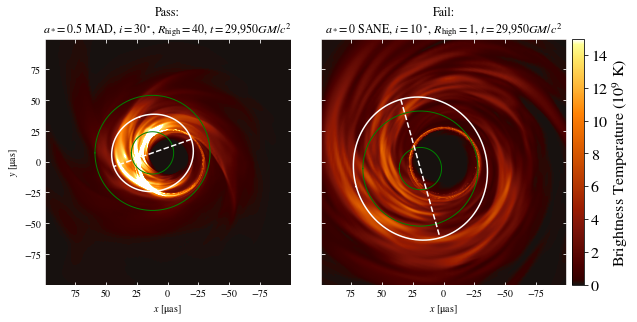

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)
fig.tight_layout()

#viz.show(imgP, ax=axes[0], cmap='afmhot_10us')
viz.show(imgP, f=lambda img: (img * scale).to(u.K), ax=axes[0], cmap='afmhot_10us', vmin=0, vmax=vmax)
viz.ellipse(*summP[-5:-3], 34.4, 34.4, 0, ax=axes[0], diameter=True, color='green', linewidth=1)
viz.ellipse(*summP[-5:-3], 93.6, 93.6, 0, ax=axes[0], diameter=True, color='green', linewidth=1)
viz.ellipse(*summP[-5:],                  ax=axes[0], diameter=True, color='w')
axes[0].tick_params(
    axis='both',
    direction='in',
    top=True,
    right=True,
    color='w',
)
for spine in axes[0].spines.values():
    spine.set_edgecolor('w')
axes[0].set_title('Pass:\n$a_*\!=0.5$ MAD, $i=30^\circ$, $R_\mathrm{high}=40$, $t=$29,950$GM/c^2$')

#viz.show(imgF, ax=axes[1], cmap='afmhot_10us')
viz.show(imgF, f=lambda img: (img * scale).to(u.K), ax=axes[1], cmap='afmhot_10us', vmin=0, vmax=vmax)
viz.ellipse(*summF[-5:-3], 34.4, 34.4, 0, ax=axes[1], diameter=True, color='green', linewidth=1)
viz.ellipse(*summF[-5:-3], 93.6, 93.6, 0, ax=axes[1], diameter=True, color='green', linewidth=1)
viz.ellipse(*summF[-5:],                  ax=axes[1], diameter=True, color='w')
axes[1].set_ylabel(None)
axes[1].tick_params(
    axis='both',
    direction='in',
    top=True,
    right=True,
    color='w',
)
for spine in axes[1].spines.values():
    spine.set_edgecolor('w')
axes[1].set_title('Fail:\n$a_*\!=0$ SANE, $i=10^\circ$, $R_\mathrm{high}=1$, $t=$29,950$GM/c^2$')

pos = axes[1].get_position()
print(pos)

cbaxes = fig.add_axes([pos.x1+0.01, pos.y0, 0.02, pos.y1-pos.y0])
cbar = fig.colorbar(cm.ScalarMappable(mpl.colors.Normalize(0,15), cmap='afmhot_10us'), ticks=np.arange(0, 15, 2), orientation="vertical", cax=cbaxes)
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label="Brightness Temperature ($10^9$ K)", size=16)

fig.savefig('output/passfail_sz.pdf', bbox_inches='tight')